<a href="https://colab.research.google.com/github/JoergNeumann/MachineLearning/blob/master/Image_Classification_mit_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification mit TensorFlow
basierend auf [Google Tutorial](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb#scrollTo=Gxg1XGm0eOBy)

### Fashion MNIST Dataset
* besteht aus 70k Graustufenbildern aus 10 Kategorien
* jedes Bild ist 28 x 28 Pixel groß / jedes Pixel hat einen Wert zwischen 0 und 255
* Labels bestehen aus Zahlen zwischen 0 und 9

![Fashion MNIST Dataset](https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png)

### Libs importieren

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Daten importieren und aufbereiten

In [13]:
# Trainings- und Test-Datasets (60k/10k), bestehend jeweils aus Labels und Images
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Pixel in Werte zwischen 0 und 1 konvertieren
train_images = train_images / 255.0
test_images = test_images / 255.0

# Array mit Kategorien anlegen
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Layers definieren

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

* Flatten macht aus einem mehrdimensionalen Array ein eindimensionales
* Dense: Ein Layer der "dicht" verbunden (fully connected) ist. Alle Neuronen sind mit allen Neuronen des nächsten Layers verbunden.
* der Hidden Layer hat 128 Knoten oder Neuronen
* die Aktivierungsfunktion ist ReLU (Rectified Linear Unit)
* der Output Layer hat 10 Neuronen (analog zu den 10 Kategorien)

### Modell kompilieren
* Loss Funktion: Misst die Abweichung zum Ziel
* Optimizer Funktion: Aktualisiert das Modell (die Gewichte) auf Basis der Loss Funktion.
* Metrics: Zur Kontrolle von Trainings und Testwerten; in diesem Fall "accuracy"

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Modell trainieren
* mit 10 Epochs (Iterationen)

In [5]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5032 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3776 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3413 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3151 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2982 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2839 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2700 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2603 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2493 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

### Modell evaluieren (bewerten)

In [6]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3328 - accuracy: 0.8817

Test accuracy: 0.8816999793052673


### Vorhersagen machen
* Das Modell gibt Logits aus - Vektoren von Wahrscheinlichkeiten.
* Diese müssen in einzelne Werte konvertiert werden
* Hierzu wird ein Softmax Layer dem Modell hinzugefügt werden

In [8]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

### Ergebnis auswerten


'Ankle boot'

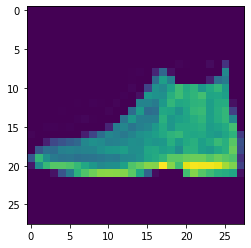

In [22]:
# Ein Element aus dem predictions Array enthält ein Array aus 10 Nummern, die die Wahrscheinlichkeit je Kategorie wiedergeben
predictions[0]
# Ermitteln welche Kategorie die höchste Wahrscheinlichkeit hat
np.argmax(predictions[0])
# Überprüfen der Richtigkeit
i = test_labels[0]
# Zum Vergleich Bild und ermittelte Kategorie ausgeben
plt.imshow(test_images[0])
class_names[i]

### Einzelnes Bild klassifizieren
* Hierzu muss das Bild in eine Liste aufgenommen werden

'Pullover'

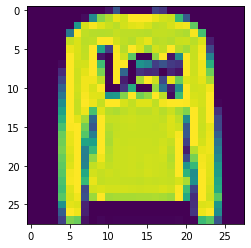

In [16]:
img = (np.expand_dims(test_images[1],0))
predictions_single = probability_model.predict(img)
i = np.argmax(predictions_single[0])
plt.imshow(test_images[1])
class_names[i]